# Exploratory Data Analysis

* Cleaning data by renaming columns, removing unnecessary data, and making sure there is no damaged data (special characters)
* Applying one-hot-encoding to the categorical features of the data set
* Implementing feature engineering to extrapolate data from existing relationships

In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [38]:
# Import data from csv files

train = pd.read_csv(r'~/desktop/COMP551/COMP551-p1/Adult/adult.csv')
test = pd.read_csv(r'~/desktop/COMP551/COMP551-p1/Adult/adult-test.csv')

all_data = pd.concat([train, test], axis=0, sort=False)

train

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Note 0 - Data Cleaning

In [39]:
# Observe columns
train.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [40]:
# Renaming columns to appropriate names from the dataset description
train.rename(columns = {" United-States": "Native Country",
                        " 40": "Hours Per Week",
                        " 0": "Capital Loss",
                        " 2174": "Capital Gain",
                        " Male": "Sex",
                        " White": "Race",
                        " Not-in-family": "Relationship",
                        " Adm-clerical": "Occupation",
                        " Never-married": "Marital Status",
                        " 13": "Education Years",
                        " Bachelors": "Education Level",
                        " State-gov": "Workclass",
                        "39": "Age"}, inplace=True)

In [41]:
# Removing this feature because data is incomprehensible
train.drop(" 77516", axis=1, inplace=True)

In [42]:
train.columns

Index(['Age', 'Workclass', 'Education Level', 'Education Years',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country',
       ' <=50K'],
      dtype='object')

In [43]:
# Transpose of training data statistics for easier viewability
print("Training data shape: ", train.shape)
train.describe().T

Training data shape:  (32560, 14)


,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Education Years,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital Gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital Loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours Per Week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [44]:
# Understanding numerical and categorical feature counts
num_data = [c for c in train.columns if train[c].dtype !='O']
cat_data = [w for w in train.columns if train[w].dtype == 'O']

print("Numerical Feature count: ", len(num_data))
num_data

Numerical Feature count:  5


['Age', 'Education Years', 'Capital Gain', 'Capital Loss', 'Hours Per Week']

In [45]:
print("Categorical Feature count: ", len(cat_data))
cat_data

Categorical Feature count:  9


['Workclass',
 'Education Level',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native Country',
 ' <=50K']

In [46]:
# null values in data
nullCounter = train.isna().sum().sort_values(ascending=False)/len(train)

nullCounter

Age                0.0
Workclass          0.0
Education Level    0.0
Education Years    0.0
Marital Status     0.0
Occupation         0.0
Relationship       0.0
Race               0.0
Sex                0.0
Capital Gain       0.0
Capital Loss       0.0
Hours Per Week     0.0
Native Country     0.0
 <=50K             0.0
dtype: float64

In [47]:
train

,Age,Workclass,Education Level,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,<=50K
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
zeroCount1 = 0
zeroCount2 = 0
for x, y in zip(train["Capital Loss"],train["Capital Gain"]):
    if x == 0:
        zeroCount1 += 1
    if y == 0:
        zeroCount2 += 1

print(zeroCount1, zeroCount2)

31041 29849


In [49]:
train.drop("Capital Loss", axis=1, inplace=True)

In [50]:
train.drop("Capital Gain", axis=1, inplace=True)

In [51]:
train.columns

Index(['Age', 'Workclass', 'Education Level', 'Education Years',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours Per Week', 'Native Country', ' <=50K'],
      dtype='object')

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32560 non-null  int64 
 1   Workclass        32560 non-null  object
 2   Education Level  32560 non-null  object
 3   Education Years  32560 non-null  int64 
 4   Marital Status   32560 non-null  object
 5   Occupation       32560 non-null  object
 6   Relationship     32560 non-null  object
 7   Race             32560 non-null  object
 8   Sex              32560 non-null  object
 9   Hours Per Week   32560 non-null  int64 
 10  Native Country   32560 non-null  object
 11   <=50K           32560 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [53]:
# Now the data below does not have any null values nor does it have irrelevant or incomprehensible features
train

,Age,Workclass,Education Level,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Hours Per Week,Native Country,<=50K
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [54]:
# The next thing is to look for special characters in the data which may indicate damaged data
train.isin([' ?']).sum()

Age                   0
Workclass          1836
Education Level       0
Education Years       0
Marital Status        0
Occupation         1843
Relationship          0
Race                  0
Sex                   0
Hours Per Week        0
Native Country      583
 <=50K                0
dtype: int64

In [55]:
# The occupation column as a significant "?"-value count
train.drop(train.index[train['Occupation'] == ' ?'], inplace = True)

In [56]:
# The native country column also has these
train.drop(train.index[train['Native Country'] == ' ?'], inplace = True)

In [57]:
# The next thing is to look for special characters in the data which may indicate damaged data
train.isin([' ?']).sum()

Age                0
Workclass          0
Education Level    0
Education Years    0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Hours Per Week     0
Native Country     0
 <=50K             0
dtype: int64

## Note 1 - One hot encoding

Now, the training data set has been cleaned relatively well. The next step is to include some feature engineering and make sure the test data is in the same format as the cleaned training data set to ensure the same input space compatibility. However, before moving on to the feature engineering, we must apply one-hot-encoding to the categorical data in the data set.

In [58]:
# Re-listing categorical features to one hot encode
cat_data

['Workclass',
 'Education Level',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native Country',
 ' <=50K']

In [59]:
train = train.rename(columns={' <=50K': 'incomeGT50'})

In [60]:
inter_train = train[['Workclass',
 'Education Level',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native Country',
 'incomeGT50']]

inter_train

,Workclass,Education Level,Marital Status,Occupation,Relationship,Race,Sex,Native Country,incomeGT50
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [61]:
train_ohe = pd.get_dummies(inter_train)
train_ohe.columns

Index(['Workclass_ Federal-gov', 'Workclass_ Local-gov', 'Workclass_ Private',
       'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc',
       'Workclass_ State-gov', 'Workclass_ Without-pay',
       'Education Level_ 10th', 'Education Level_ 11th',
       'Education Level_ 12th', 'Education Level_ 1st-4th',
       'Education Level_ 5th-6th', 'Education Level_ 7th-8th',
       'Education Level_ 9th', 'Education Level_ Assoc-acdm',
       'Education Level_ Assoc-voc', 'Education Level_ Bachelors',
       'Education Level_ Doctorate', 'Education Level_ HS-grad',
       'Education Level_ Masters', 'Education Level_ Preschool',
       'Education Level_ Prof-school', 'Education Level_ Some-college',
       'Marital Status_ Divorced', 'Marital Status_ Married-AF-spouse',
       'Marital Status_ Married-civ-spouse',
       'Marital Status_ Married-spouse-absent',
       'Marital Status_ Never-married', 'Marital Status_ Separated',
       'Marital Status_ Widowed', 'Occupation_ Adm-cle

In [62]:
train.head()

,Age,Workclass,Education Level,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Hours Per Week,Native Country,incomeGT50
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [71]:
# Now we can generate the data set to feed to the knn model (purely numerical data set)
train_original_num = train[['Age', 'Education Years', 'Hours Per Week']]
frames = [train_ohe,train_original_num]
_train_numerical = pd.concat(frames, axis=1)

# Shapes of the final, cleaned data sets
print(_train_numerical.shape, train.shape)

print(_train_numerical.columns)

(30161, 103) (30161, 13)
Index(['Workclass_ Federal-gov', 'Workclass_ Local-gov', 'Workclass_ Private',
       'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc',
       'Workclass_ State-gov', 'Workclass_ Without-pay',
       'Education Level_ 10th', 'Education Level_ 11th',
       'Education Level_ 12th',
       ...
       'Native Country_ Thailand', 'Native Country_ Trinadad&Tobago',
       'Native Country_ United-States', 'Native Country_ Vietnam',
       'Native Country_ Yugoslavia', 'incomeGT50_ <=50K', 'incomeGT50_ >50K',
       'Age', 'Education Years', 'Hours Per Week'],
      dtype='object', length=103)


## Note 2 - Feature Engineering

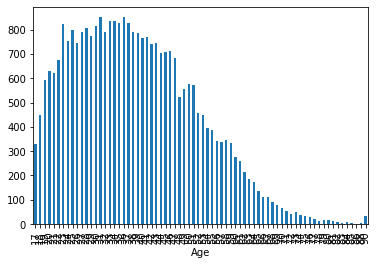

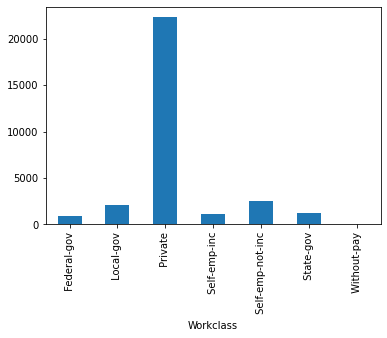

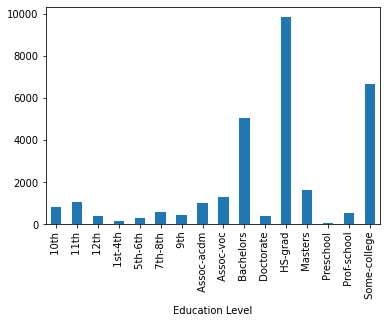

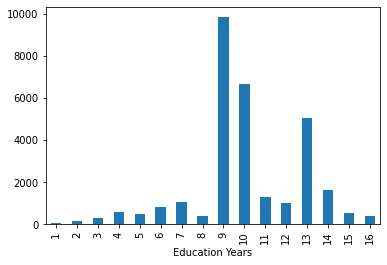

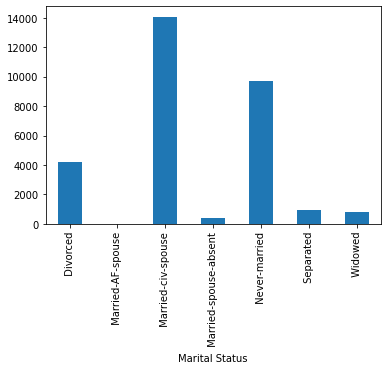

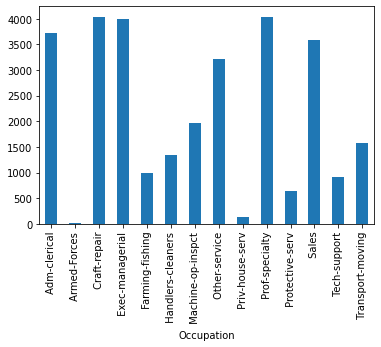

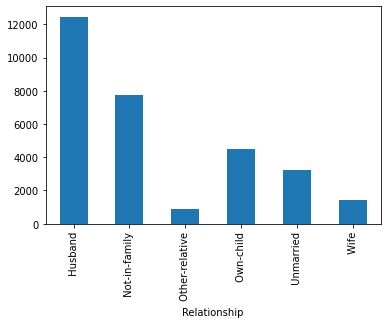

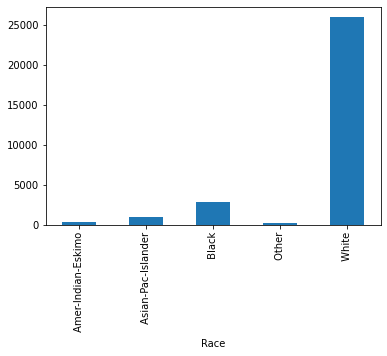

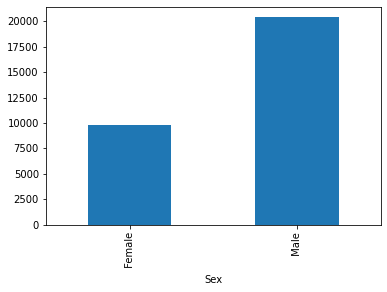

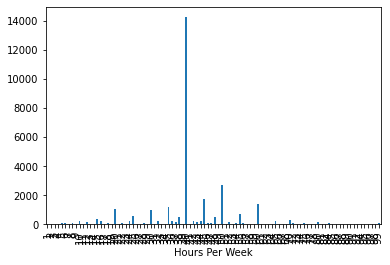

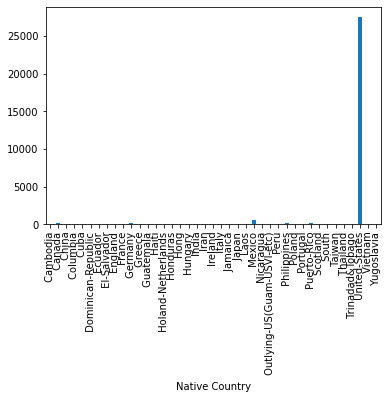

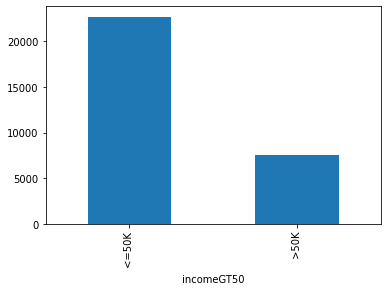

In [64]:
# Distributions of values in categorical features
for col in train.columns:
    plt.figure()
    train.groupby(by=col).size().plot.bar()

In [65]:
for col in train.columns:
    print ("---- %s ---" % col)
    print (train[col].value_counts())

---- Age ---
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
85      3
88      3
86      1
Name: Age, Length: 72, dtype: int64
---- Workclass ---
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64
---- Education Level ---
 HS-grad         9840
 Some-college    6678
 Bachelors       5043
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: Education Level, dtype: int64
---- Education Years ---
9     9840
10    6678
13    5043
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151


In [66]:
train['IncomeBin'] = train['incomeGT50'].map({' <=50K': 0, ' >50K': 1}).astype(int)

<AxesSubplot:xlabel='Age'>

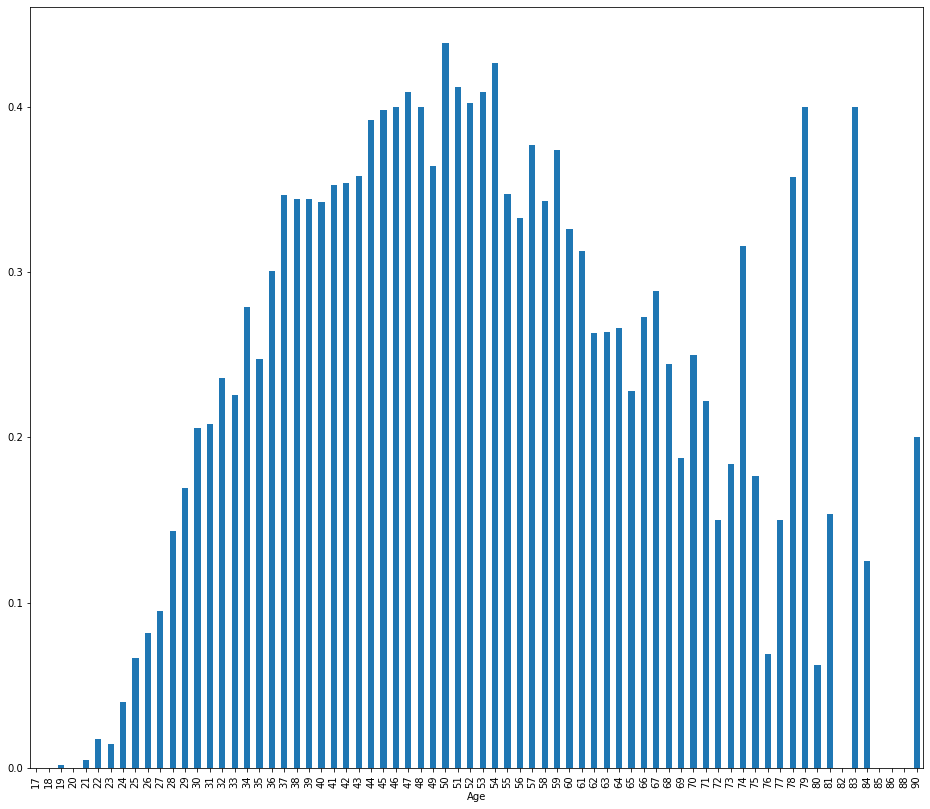

In [67]:
train.groupby('Age').IncomeBin.mean().plot(kind='bar', figsize=(16,14))

<AxesSubplot:xlabel='Education Years'>

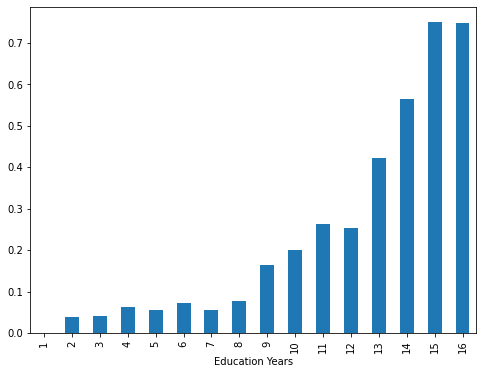

In [68]:
train.groupby('Education Years').IncomeBin.mean().plot(kind='bar', figsize=(8,6))

<AxesSubplot:xlabel='Hours Per Week'>

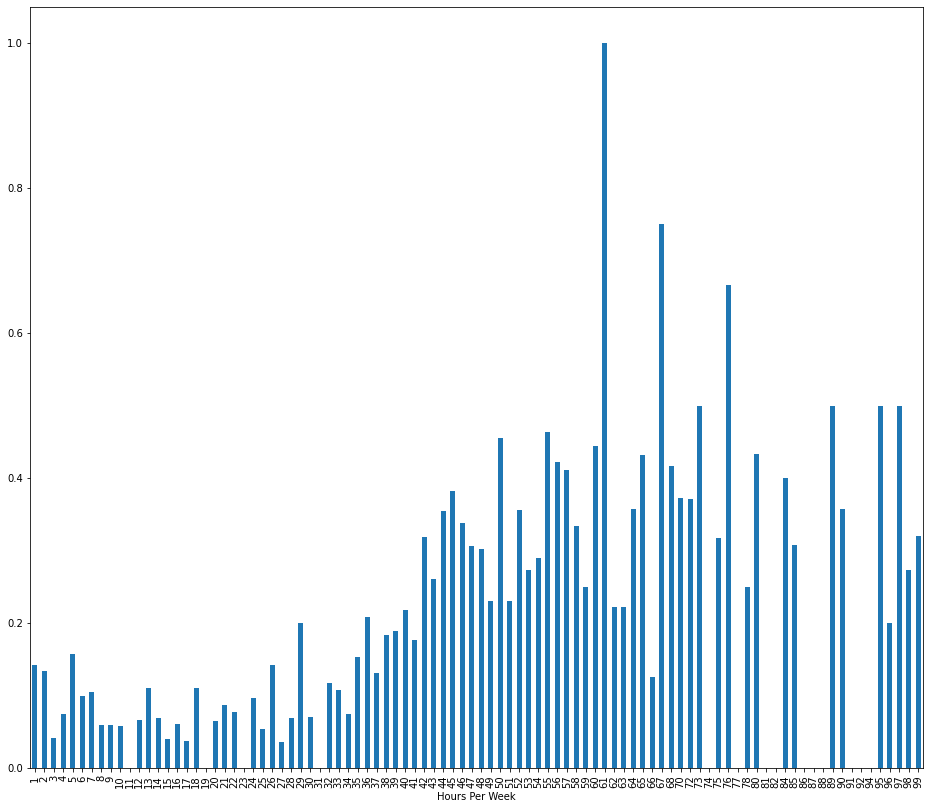

In [69]:
train.groupby('Hours Per Week').IncomeBin.mean().plot(kind='bar', figsize=(16,14))

## Note 3 - KNN Classifier

In [77]:
test.columns

Index(['|1x3 Cross validator'], dtype='object')

In [99]:
# Hyper-parameter K
K = 8

Xtrain_df = _train_numerical.drop(['incomeGT50_ <=50K', 'incomeGT50_ >50K'], 1)
X = np.array(Xtrain_df)

#Xtest_df = test.drop(['<=50K'], 1)
#Xtest = np.array(Xtest_df)

Ytrain_df = _train_numerical[['incomeGT50_ <=50K', 'incomeGT50_ >50K']]
Y = np.array(Ytrain_df)

#Ytest = np.array(test[' <=50K'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [100]:
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [102]:
print("K = ", K)

# Test on model on the test dataset
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_pred, y_test)
print("KNN accuracy:", acc_score)

# Determine our model's score
score = clf.score(X_test, y_test)
print("KNN score:", score)

K =  8
KNN accuracy: 0.7637991049229239
KNN score: 0.7637991049229239
